<a href="https://colab.research.google.com/github/Swapnadeepgit/Timeseries-Forecating/blob/main/timeseriesforecastingbyLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Long Short-Term Memory networks, or LSTMs for short, can be applied to time series forecasting.There are many types of LSTM models that can be used for each specific type of time series forecasting problem.LSTM based on RNN is a form of using ANN which mainly works with sequence of data**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df=pd.read_csv('/content/monthly-milk-production-pounds.csv',index_col=0,parse_dates=True)
df.index.freq='MS'
df.head()

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Month'>

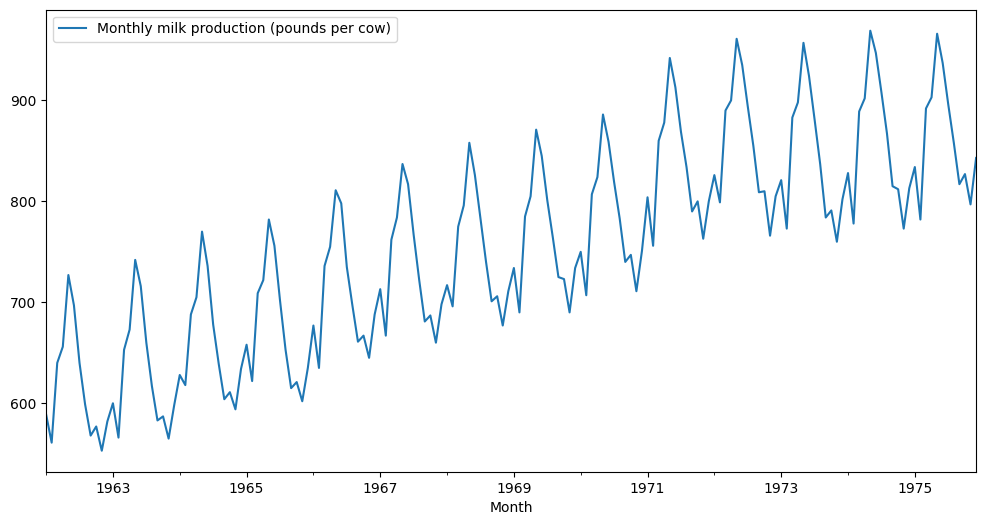

In [3]:
df.plot(figsize=(12,6))

In [4]:
#importing seasonal_decompose in order to decompose different aspects of time series
from statsmodels.tsa.seasonal import seasonal_decompose



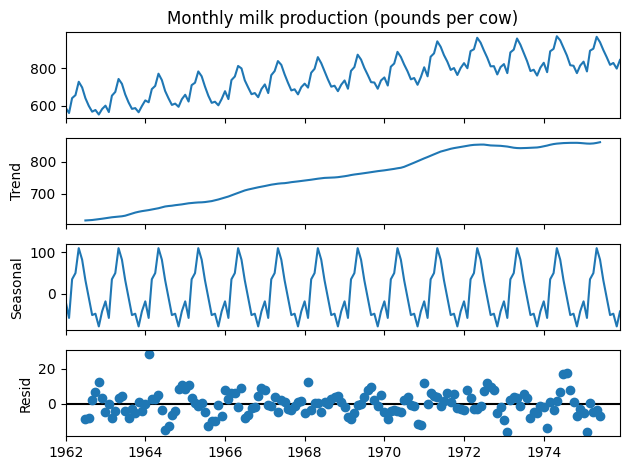

In [5]:
#applying the seasonal_decompose over a coloumn of the dataset
decompose=seasonal_decompose(df['Monthly milk production (pounds per cow)'  ])
decompose.plot();

In [ ]:
#viewing the names of the columns
df.columns

Index(['Monthly milk production (pounds per cow)'], dtype='object')

In [ ]:
#LSTM based on rnn can work on non stationary dasta, it is not required to make the data stationary as in ARIMA and AR models


In [6]:
#checkingm the length
len(df)

168

In [7]:
#using the all values keeping last 12 months for the testing setand diving the data into trianing and testing set
train=df.iloc[:156]
test=df.iloc[156:]

In [11]:
#scaling the data of zero to one
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df.head(),df.tail()
scaler.fit(train)#fitting the scaler object on the training set
#transformiing the scaled data
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [12]:
df.head(),df.tail()

(            Monthly milk production (pounds per cow)
 Month                                               
 1962-01-01                                       589
 1962-02-01                                       561
 1962-03-01                                       640
 1962-04-01                                       656
 1962-05-01                                       727,
             Monthly milk production (pounds per cow)
 Month                                               
 1975-08-01                                       858
 1975-09-01                                       817
 1975-10-01                                       827
 1975-11-01                                       797
 1975-12-01                                       843)

In [13]:
#printing the first 10 values
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [15]:
#formating the data into the neural network model as a sequence of input and output
#defining generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)


In [24]:
#batches the generator has created
X,y=generator[0]
print('Given the array',X.flatten())
print('We should get the array',y)

Given the array [0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]
We should get the array [[0.11298077]]


In [22]:
X.shape

(1, 12, 1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
#calling the model
model=Sequential()
#adding the layers
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))#input layer
model.add(Dense(1))#outputlayer
model.compile(optimizer='adam',loss='mse')#final compilation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#fitting the model
model.fit(generator,epochs=50)

Epoch 1/50
 21/144 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1590

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0933
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0225
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0152
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0135
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0080
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0071
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0043
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0029
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0041
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0057
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0028
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.

Text(0, 0.5, 'Loss')

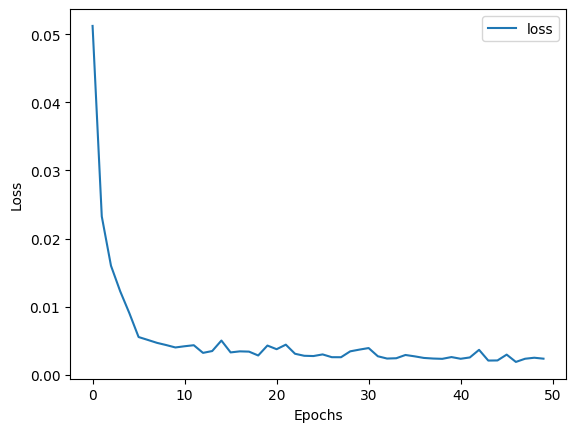

In [29]:
#detecting the loss per epoch
loss_per_epoch=pd.DataFrame(model.history.history)
loss_per_epoch.plot()
#naming the axis of the plots
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [31]:
#creating the batches of input and predicting  the output
#based on the last 12 months
last_train_batch=scaled_train[-12:]
last_train_batch=last_train_batch.reshape((1,n_input,n_features))#reshaping the data
model.predict(last_train_batch)#predicted by the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.65070397]], dtype=float32)

In [32]:
scaled_test[0] #original valuue

array([0.67548077])

In [54]:
#prediction on the testing set
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
  #get the prediction value for the first batch
  current_pred=model.predict(current_batch)[0]

  #append the prediction  into the array
  test_predictions.append(current_pred)

  #using the prediction to update the batch and remove the first value
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [36]:
test_predictions

[0,
 array([0.65070397], dtype=float32),
 array([0.63210195], dtype=float32),
 array([0.82711715], dtype=float32),
 array([0.9045539], dtype=float32),
 array([1.0149044], dtype=float32),
 array([1.0002289], dtype=float32),
 array([0.92063963], dtype=float32),
 array([0.8025653], dtype=float32),
 array([0.6820574], dtype=float32),
 array([0.6302418], dtype=float32),
 array([0.57424325], dtype=float32),
 array([0.60947], dtype=float32)]

In [56]:
test.head()

,Monthly milk production (pounds per cow),Predictions
Month,,
1975-01-01,834,NaN
1975-02-01,782,NaN
1975-03-01,892,NaN
1975-04-01,903,NaN
1975-05-01,966,NaN


In [57]:
#converting test predictions to numpy array
test_predictions=np.array(test_predictions)
test_predictions

array([[0.65070397],
       [0.63210195],
       [0.82711715],
       [0.9045539 ],
       [1.0149044 ],
       [1.0002289 ],
       [0.92063963],
       [0.8025653 ],
       [0.6820574 ],
       [0.6302418 ],
       [0.57424325],
       [0.60947   ]], dtype=float32)

In [58]:
#transforming the predictions to originaal scale
true_predictions=scaler.inverse_transform(test_predictions)

In [62]:
test['Predictions']=true_predictions

<ipython-input-62-37e263692d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


<Axes: xlabel='Month'>

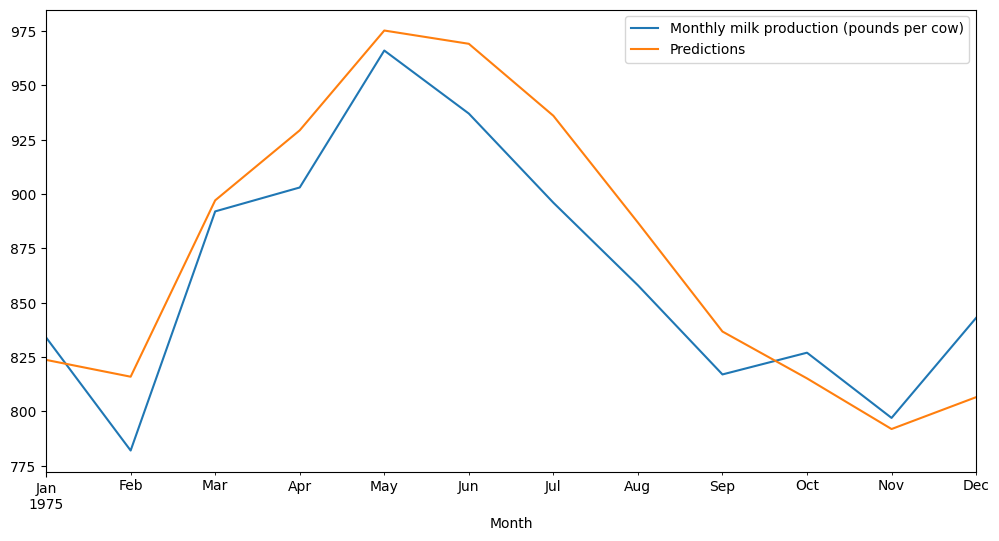

In [64]:
test.plot(figsize=(12,6))

In [65]:
#calculating the error and accuracy percentage of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Monthly milk production (pounds per cow)'],test['Predictions']))
print(rmse)


24.84623980251778
